# Object Detection

Importing the libraries

In [32]:
import torch
from torch.autograd import Variable
import cv2
from data import BaseTransform, VOC_CLASSES as labelmap
from ssd import build_ssd
import imageio

Defining a function that will do the detections

* We define a detect function that will take as inputs, a frame, a ssd neural network, and a transformation to be applied on the images, and that will return the frame with the detector rectangle.
* We get the height and the width of the frame.
* We apply the transformation to our frame.
* We convert the frame into a torch tensor.
* We add a fake dimension corresponding to the batch.
* We feed the neural network ssd with the image and we get the output y.
* We create the detections tensor contained in the output y.
* We create a tensor object of dimensions [width, height, width, height].

For every class:

* We initialize the loop variable j that will correspond to the occurrences of the class.
* We take into account all the occurrences j of the class i that have a matching score larger than 0.6.
* We get the coordinates of the points at the upper left and the lower right of the detector rectangle.
* We put the label of the class right above the rectangle.
* We increment j to get to the next occurrence.

We return the original frame with the detector rectangle and the label around the detected object.

In [33]:
def detect(frame, net, transform):
    height, width = frame.shape[:2]
    frame_t = transform(frame)[0]
    x = torch.from_numpy(frame_t).permute(2, 0, 1) 
    x = Variable(x.unsqueeze(0)) 
    y = net(x)
    detections = y.data
    scale = torch.Tensor([width, height, width, height]) 
    for i in range(detections.size(1)): 
        j = 0 
        while detections[0, i, j, 0] >= 0.6: 
            pt = (detections[0, i, j, 1:] * scale).numpy() 
            cv2.putText(frame, labelmap[i - 1],
                        (int(pt[0]), int(pt[1])),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        2,(255, 255, 255), 2,
                        cv2.LINE_AA) 
            j += 1 
    return frame 

Creating the SSD neural network

* We create an object that is our neural network ssd.
* We get the weights of the neural network from another one that is pretrained (ssd300_mAP_77.43_v2.pth).

In [34]:
net = build_ssd('test')
net.load_state_dict(
    torch.load('ssd300_mAP_77.43_v2.pth',
               map_location = lambda storage,
               loc: storage)) 

Creating the transformation

* We create an object of the BaseTransform class, a class that will do the required transformations so that the image can be the input of the neural network.

In [35]:
transform = BaseTransform(net.size, (104/256.0, 117/256.0, 123/256.0))

Doing some Object Detection on a video

* We open the video.
* We get the fps frequence (frames per second).
* We create an output video with this same fps frequence.

We iterate on the frames of the output video:

* We call our detect function (defined above) to detect the object on the frame.
* We add the next frame in the output video.
* We print the number of the processed frame.
* We close the process that handles the creation of the output video.

In [7]:
reader = imageio.get_reader('funny_dog.mp4') 
fps = reader.get_meta_data()['fps'] 
writer = imageio.get_writer('outputDog.mp4', fps = fps) 
for i, frame in enumerate(reader): 
    frame = detect(frame, net.eval(), transform) 
    writer.append_data(frame) 
    if(i%10 == 0):
        print("Frame Processed: "+str(i)) 
writer.close() 

C:\Users\Ripti\Dropbox\Peoples\CSS143\Deep-Learning-Computer-Vision-A-Z-\02-Object-Detection-With-SSD\CourseContent\ssd.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.softmax(conf.view(-1, self.num_classes)),  # conf preds


Frame Processed: 0
Frame Processed: 10
Frame Processed: 20
Frame Processed: 30
Frame Processed: 40
Frame Processed: 50
Frame Processed: 60


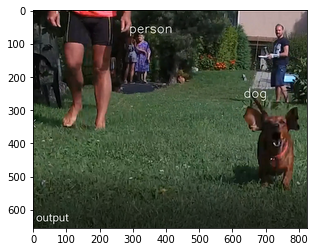

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread('dogOutput.png'),interpolation= 'lanczos')
plt.show()

# Homework Challenge

This one is going to be exciting. Your mission is to detect some epic horses galloping in one of the most magical places in the world. The video of these horses is attached in the folder.

* Importing the libraries

In [3]:
import torch
from torch.autograd import Variable
import cv2
from data import BaseTransform, VOC_CLASSES as labelmap
from Training_SSD import ssd
from ssd import build_ssd
import imageio

Defining a function that will do the detections

* We define a detect function that will take as inputs, a frame, a ssd neural network, and a transformation to be applied on the images, and that will return the frame with the detector rectangle.
* We get the height and the width of the frame.
* We apply the transformation to our frame.
* We convert the frame into a torch tensor.
* We add a fake dimension corresponding to the batch.
* We feed the neural network ssd with the image and we get the output y.
* We create the detections tensor contained in the output y.
* We create a tensor object of dimensions [width, height, width, height].

For every class:

* We initialize the loop variable j that will correspond to the occurrences of the class.
* We take into account all the occurrences j of the class i that have a matching score larger than 0.6.
* We get the coordinates of the points at the upper left and the lower right of the detector rectangle.
* We draw a rectangle around the detected object.
* We put the label of the class right above the rectangle.
* We increment j to get to the next occurrence.

We return the original frame with the detector rectangle and the label around the detected object.

In [4]:
def detect(frame, net, transform):
    height, width = frame.shape[:2]
    frame_t = transform(frame)[0]
    x = torch.from_numpy(frame_t).permute(2, 0, 1)
    x = Variable(x.unsqueeze(0))
    y = net(x)
    detections = y.data
    scale = torch.Tensor([width, height, width, height])
    for i in range(detections.size(1)):
        j = 0 
        while detections[0, i, j, 0] >= 0.6:
            pt = (detections[0, i, j, 1:] * scale).numpy()
            cv2.rectangle(
                frame, 
                (int(pt[0]), int(pt[1])), 
                (int(pt[2]), int(pt[3])), 
                (255, 0, 0), 2)
            cv2.putText(
                frame,
                labelmap[i - 1],
                (int(pt[0]),int(pt[1])),
                cv2.FONT_HERSHEY_SIMPLEX,
                2, (255, 255, 255),2,
                cv2.LINE_AA)
            j += 1
    return frame 

Creating the SSD neural network

* We create an object that is our neural network ssd.
* We get the weights of the neural network from another one that is pretrained (ssd300_mAP_77.43_v2.pth).

In [5]:
net = build_ssd('test')
net.load_state_dict(
    torch.load('ssd300_mAP_77.43_v2.pth',
               map_location = lambda storage, loc: storage)) 

Creating the transformation

* We create an object of the BaseTransform class, a class that will do the required transformations so that the image can be the input of the neural network.

In [6]:
transform = BaseTransform(net.size, (104/256.0, 117/256.0, 123/256.0))

Doing some Object Detection on a video

* We open the video.
* We get the fps frequence (frames per second).
* We create an output video with this same fps frequence.

We iterate on the frames of the output video:

* We call our detect function (defined above) to detect the object on the frame.
* We add the next frame in the output video.
* We print the number of the processed frame.
* We close the process that handles the creation of the output video.

In [11]:
reader = imageio.get_reader('epic_horses.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('outputHorse.mp4', fps = fps) 
for i, frame in enumerate(reader): 
    frame = detect(frame, net.eval(), transform)
    writer.append_data(frame) 
    if(i%50 == 0):
        print("Processing frame: "+str(i)) 
writer.close() 

C:\Users\Ripti\Dropbox\Peoples\CSS143\Deep-Learning-Computer-Vision-A-Z-\02-Object-Detection-With-SSD\CourseContent\ssd.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.softmax(conf.view(-1, self.num_classes)),  # conf preds


Processing frame: 0
Processing frame: 50
Processing frame: 100
Processing frame: 150
Processing frame: 200
Processing frame: 250


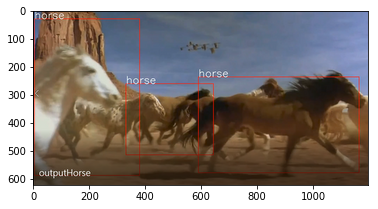

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread('horseOutput.png'),interpolation= 'lanczos')
plt.show()